# Análisis Exploratorio Automático - SweetViz
## Polígonos Unificados Completos

Este notebook realiza un análisis exploratorio automatizado (EDA) del archivo `data/processed/unificado/poligonos_unificados_completo.csv` utilizando **SweetViz**.

**Objetivo:** Generar visualizaciones interactivas y estadísticas descriptivas completas del conjunto de datos de polígonos unificados de Hermosillo.

**Contenido:**
1. Instalación e importación de librerías
2. Carga del dataset
3. Generación del reporte SweetViz
4. Visualización en el notebook
5. Exportación a HTML

## 1. Instalación e Importación de Librerías

In [1]:
import subprocess
import sys

# Verificar si SweetViz está instalado, si no, instalarlo
try:
    import sweetviz
    print("✓ SweetViz ya está instalado")
except ImportError:
    print("📦 Instalando SweetViz...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "sweetviz", "-q"])
    import sweetviz
    print("✓ SweetViz instalado correctamente")

# Importar librerías necesarias
import pandas as pd
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

print("✅ Librerías cargadas correctamente")

✓ SweetViz ya está instalado
✅ Librerías cargadas correctamente


## 2. Carga del Dataset

In [2]:
# Definir ruta del archivo
data_path = Path('../data/processed/unificado/poligonos_unificados_completo.csv')

# Verificar si el archivo existe
if not data_path.exists():
    print(f"❌ Error: El archivo no existe en {data_path.resolve()}")
else:
    # Cargar el dataset
    print(f"📂 Cargando datos desde: {data_path}")
    df = pd.read_csv(data_path)
    print(f"✅ Dataset cargado correctamente\n")
    
    # Información básica del dataset
    print("=" * 70)
    print("INFORMACIÓN BÁSICA DEL DATASET")
    print("=" * 70)
    print(f"\n📊 Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
    print(f"\n📋 Primeras columnas:")
    print(df.head(3))
    
    print(f"\n📋 Tipos de datos:")
    print(df.dtypes)
    
    print(f"\n📭 Valores faltantes:")
    missing = df.isnull().sum()
    if missing.sum() == 0:
        print("   ✓ No hay valores faltantes")
    else:
        print(missing[missing > 0])
    
    print(f"\n📈 Estadísticas descriptivas de columnas numéricas:")
    print(df.describe())

📂 Cargando datos desde: ..\data\processed\unificado\poligonos_unificados_completo.csv
✅ Dataset cargado correctamente

INFORMACIÓN BÁSICA DEL DATASET

📊 Dimensiones: 700 filas × 30 columnas

📋 Primeras columnas:
   cve_ent  cve_mun  cve_loc     nom_loc        CVE_COL  \
0       26       30        1  Hermosillo  2603000016735   
1       26       30        1  Hermosillo  2603000011785   
2       26       30        1  Hermosillo  2603000016335   

                           COLONIA       CP  otros_cp  total_incidentes  \
0   ALTA FIRENZE NORTE RESIDENCIAL  83104.0       NaN                 1   
1              JORGE VALDEZ MUÃOZ  83104.0       NaN              3066   
2  VILLA VERDE CERRADA SAN VICENTE  83118.0       NaN                 0   

   incidentes_alta  ...  viviendas_totales  escolaridad_años_prom  \
0                1  ...               68.0                   14.9   
1             1404  ...              366.0                    9.4   
2                0  ...              261.0 

## 3. Generación del Reporte SweetViz

SweetViz genera un análisis exploratorio completo con:
- Distribuciones univariantes (histogramas, gráficos de barras)
- Estadísticas descriptivas por tipo de variable
- Correlaciones y asociaciones
- Análisis de datos faltantes
- Comparaciones entre variables

In [3]:
print("🔄 Generando reporte SweetViz...")
print("   (Esto puede tomar algunos segundos dependiendo del tamaño del dataset)\n")

# Generar reporte SweetViz
report = sweetviz.analyze(df)

print("✅ Reporte generado correctamente")

🔄 Generando reporte SweetViz...
   (Esto puede tomar algunos segundos dependiendo del tamaño del dataset)



                                             |          | [  0%]   00:00 -> (? left)

✅ Reporte generado correctamente


## 4. Visualización del Reporte en el Notebook


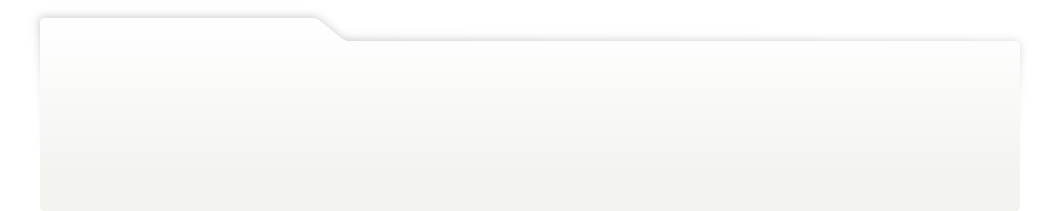
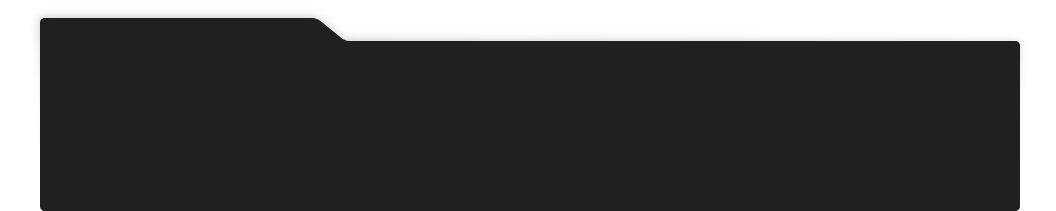
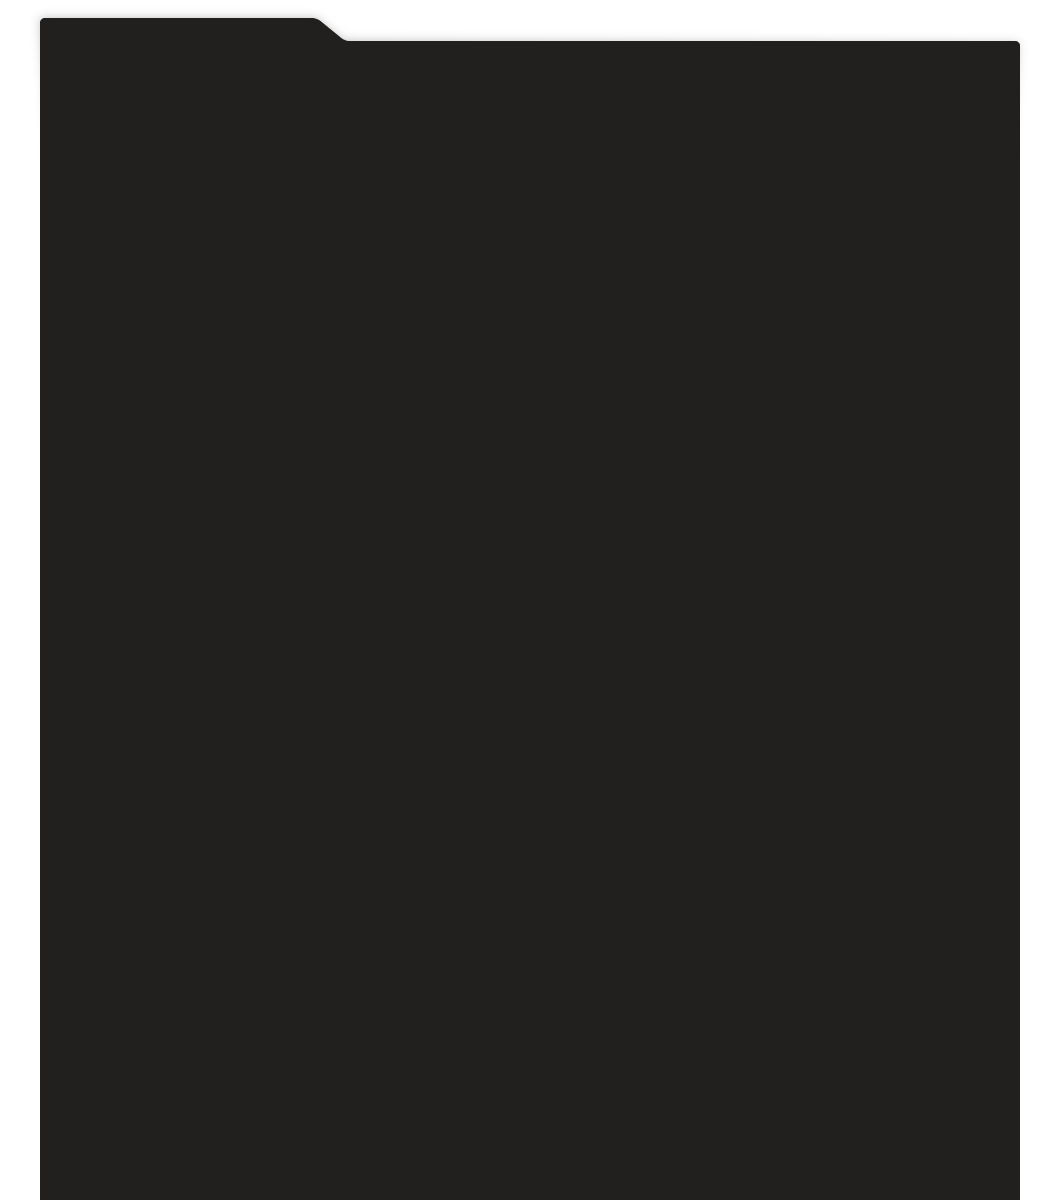
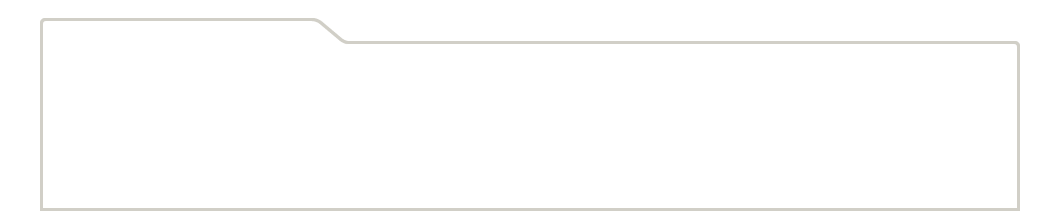
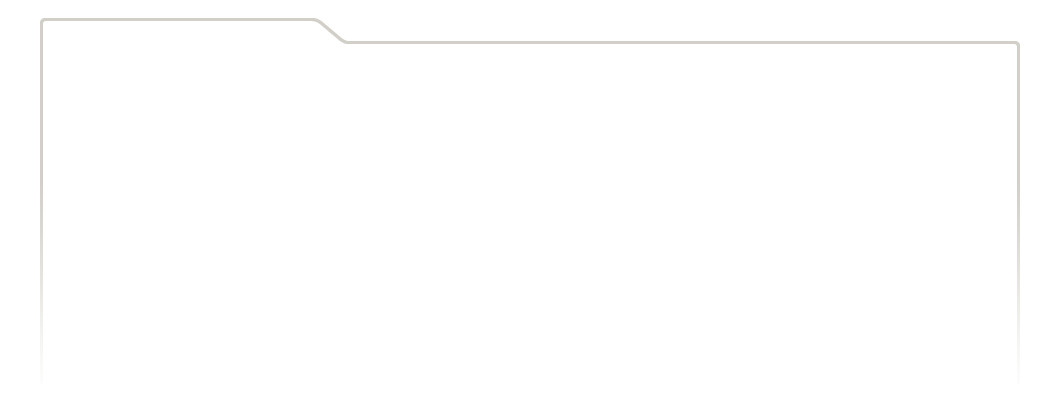
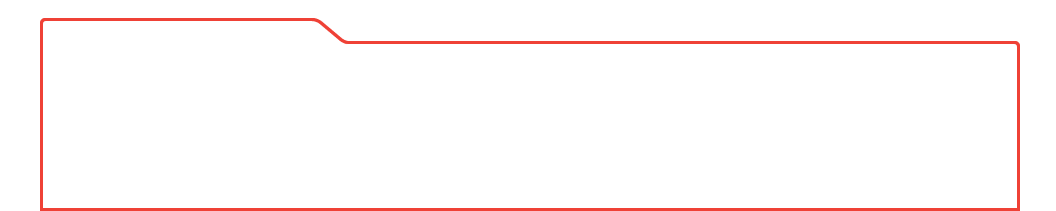
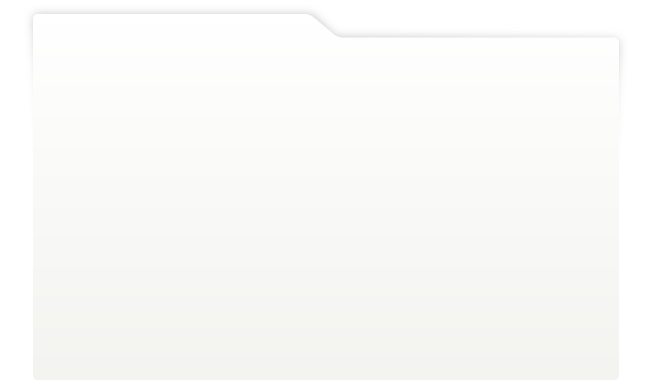
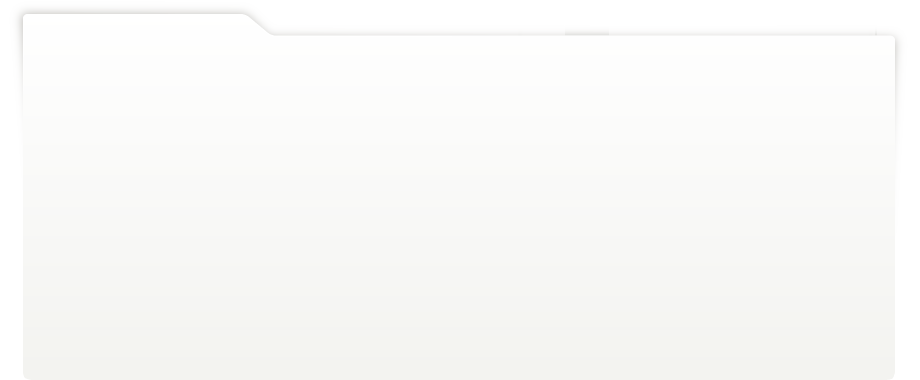
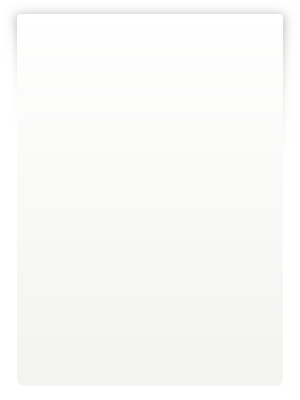
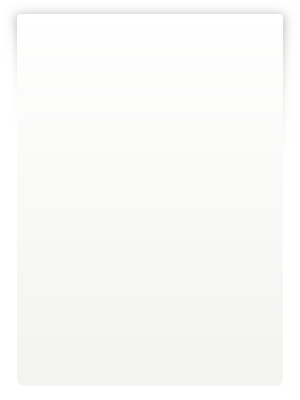
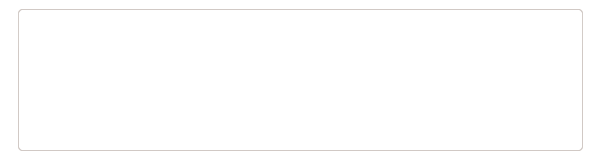
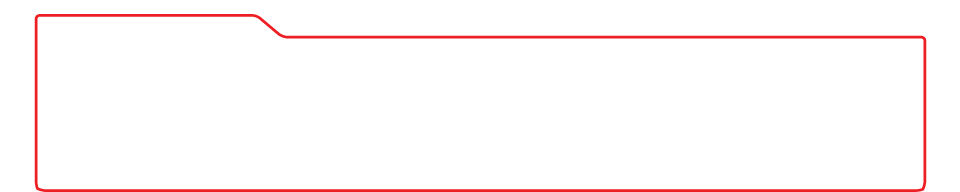
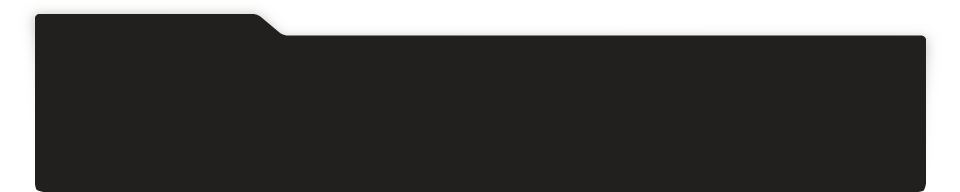
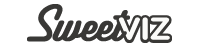
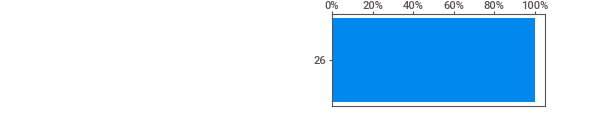
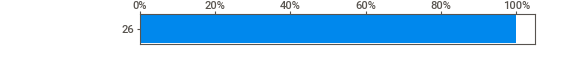
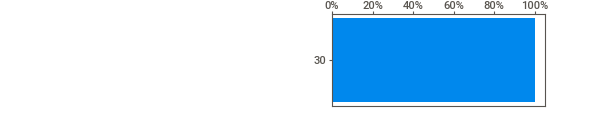
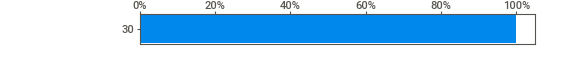
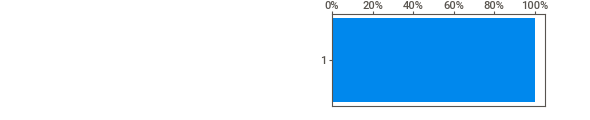
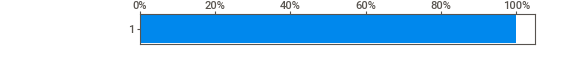
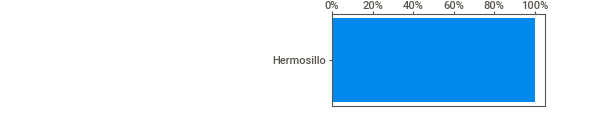
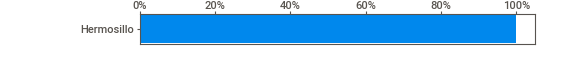
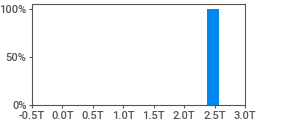
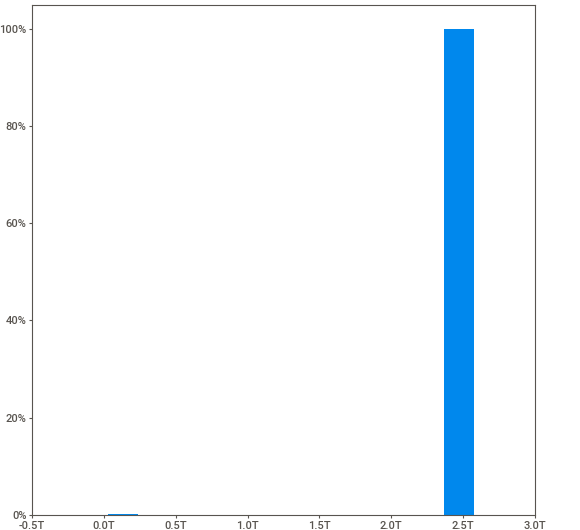
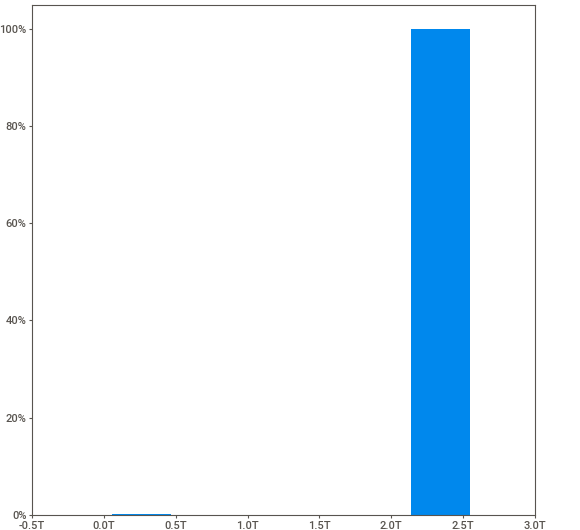
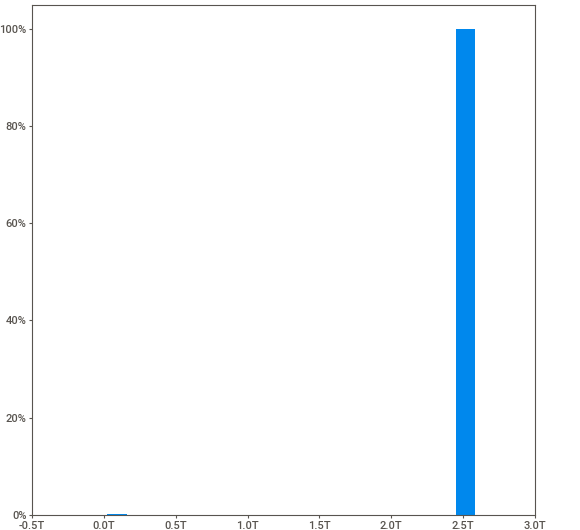
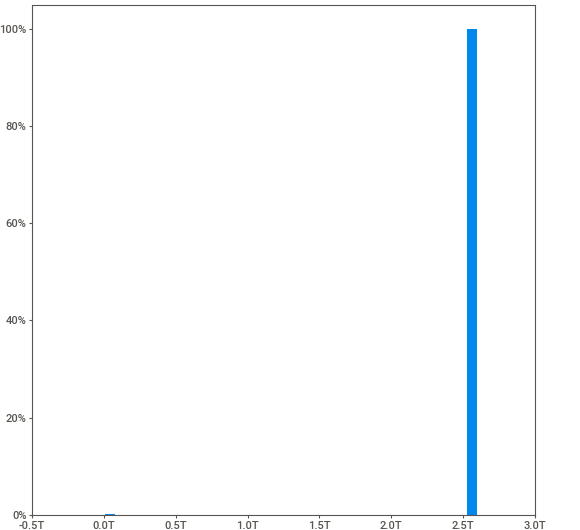
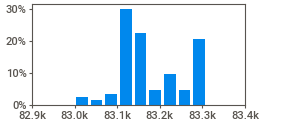
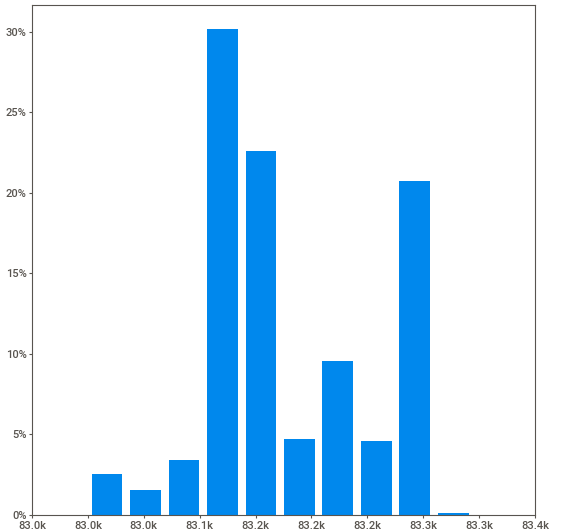
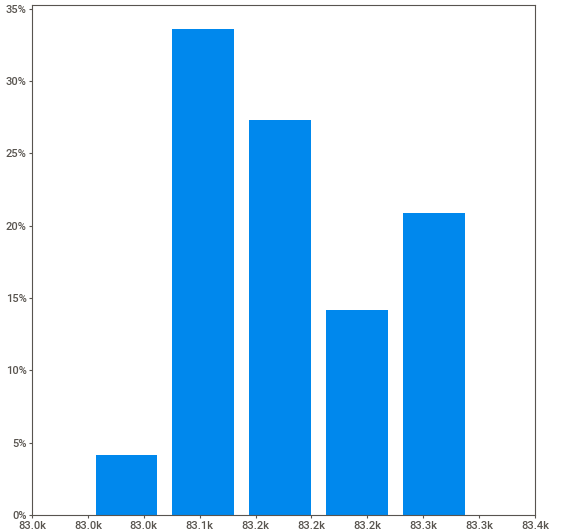
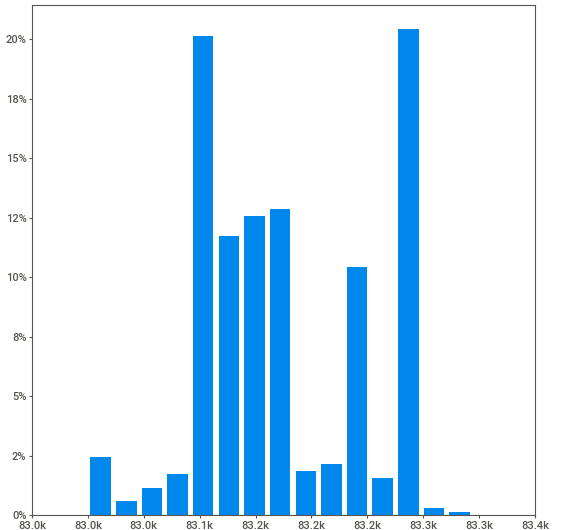
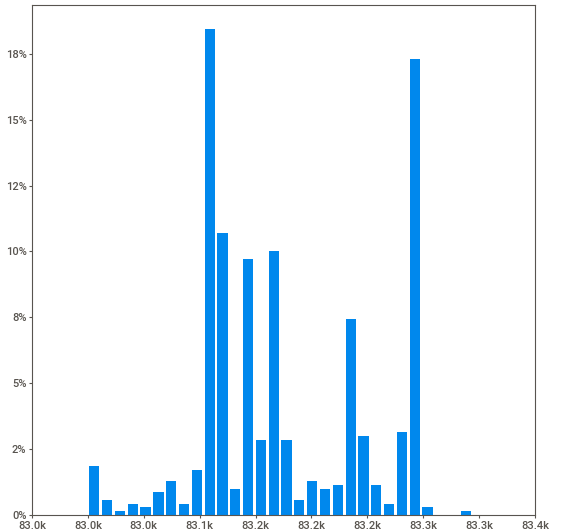
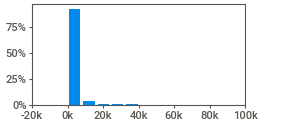
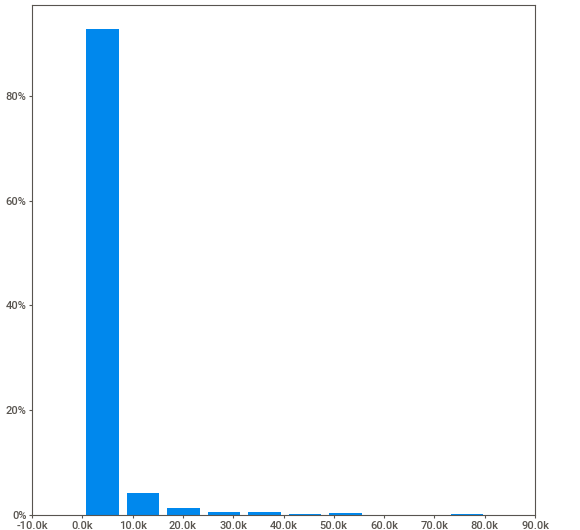
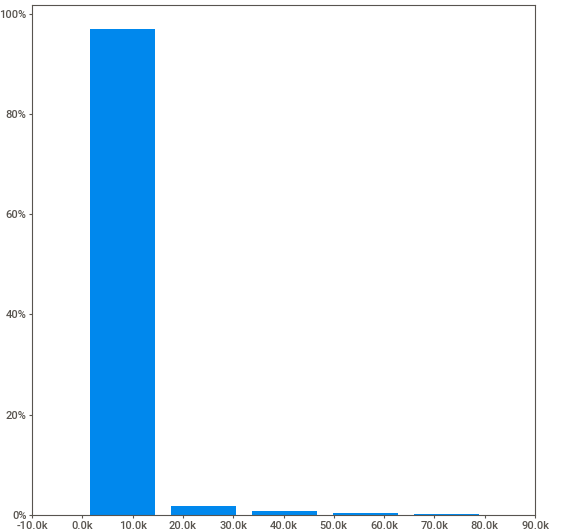
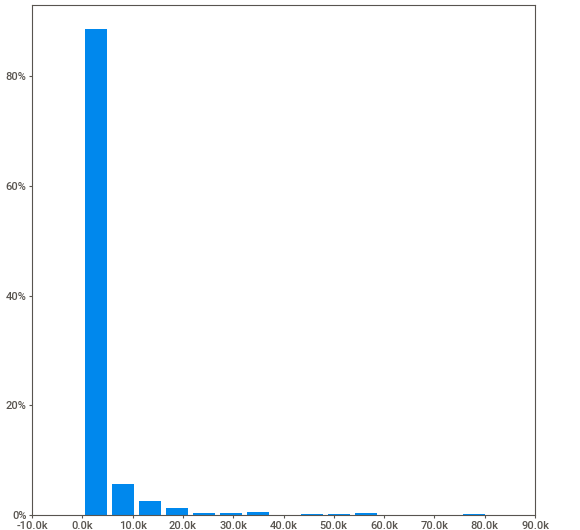
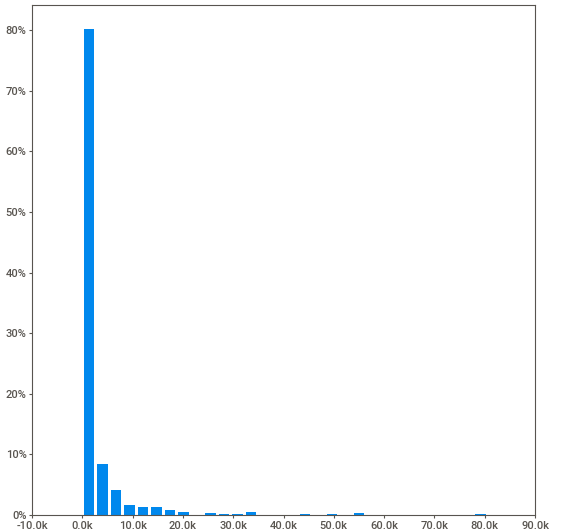
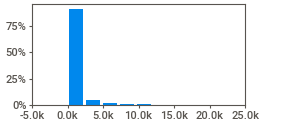
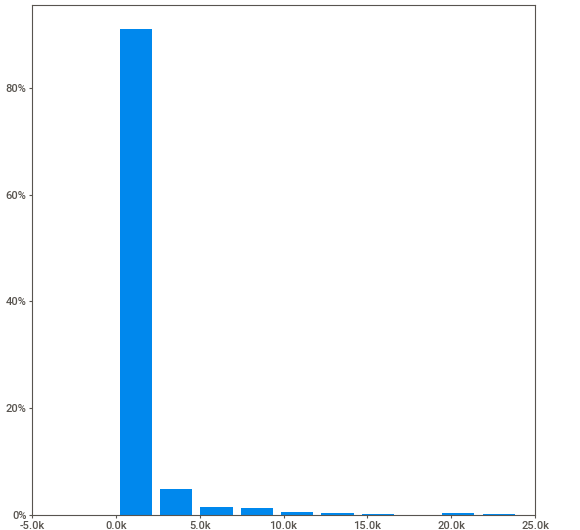
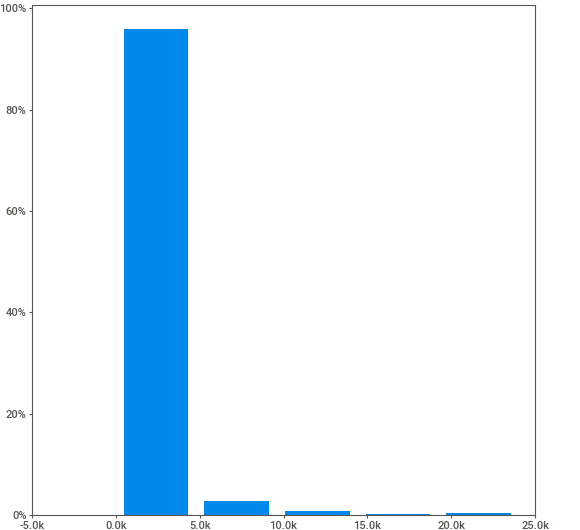
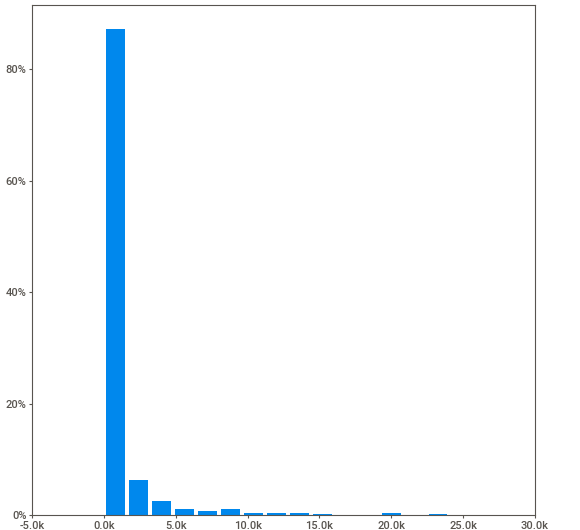
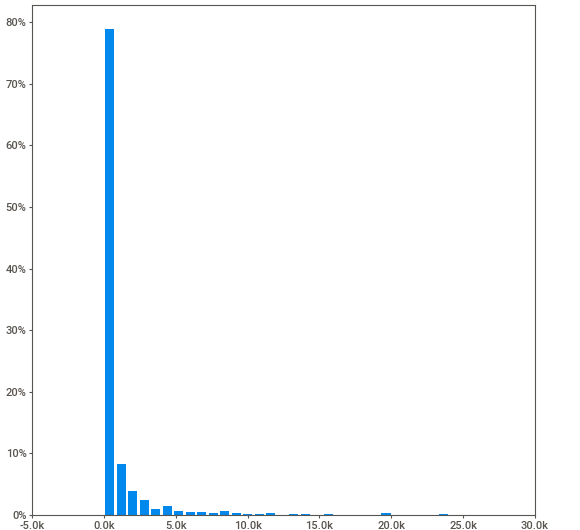
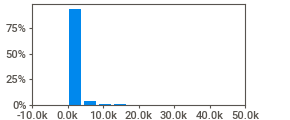
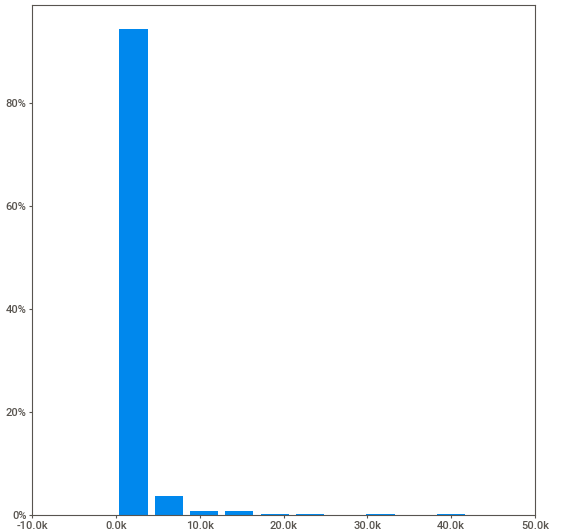
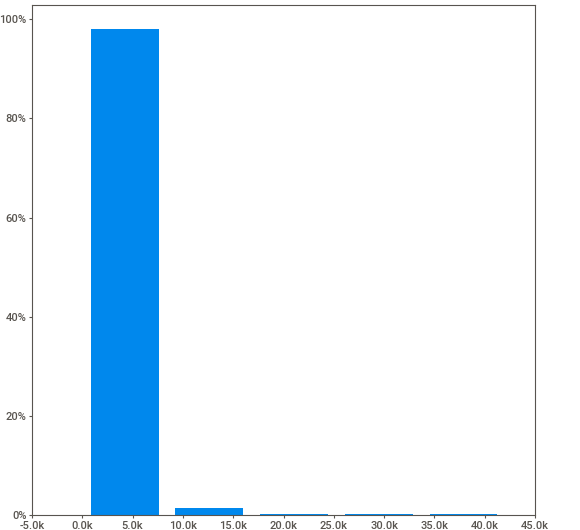
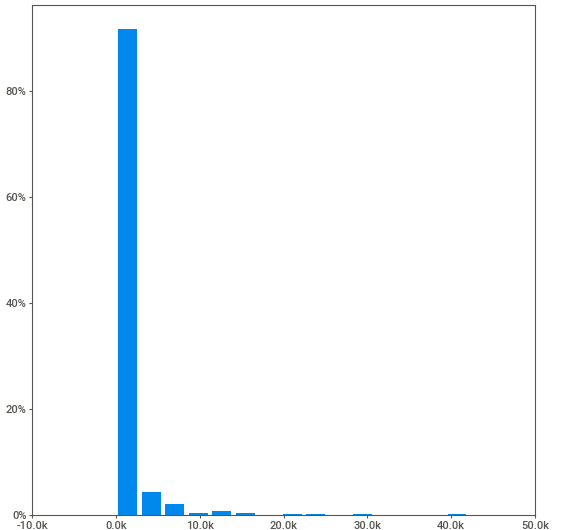
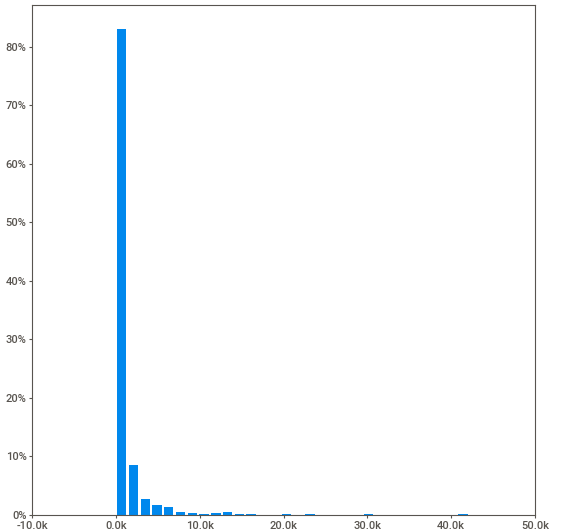
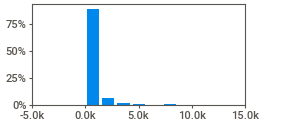
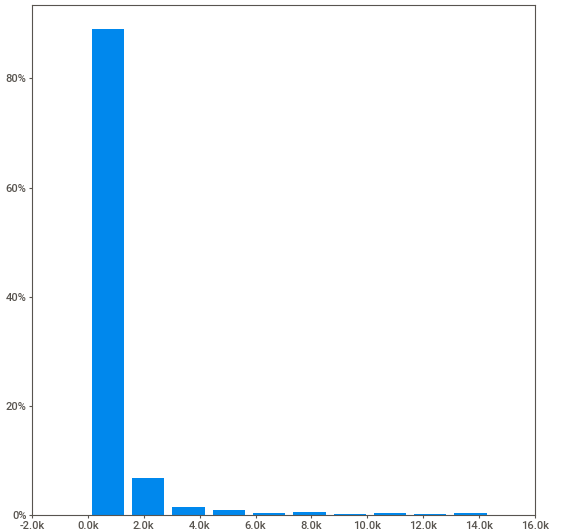
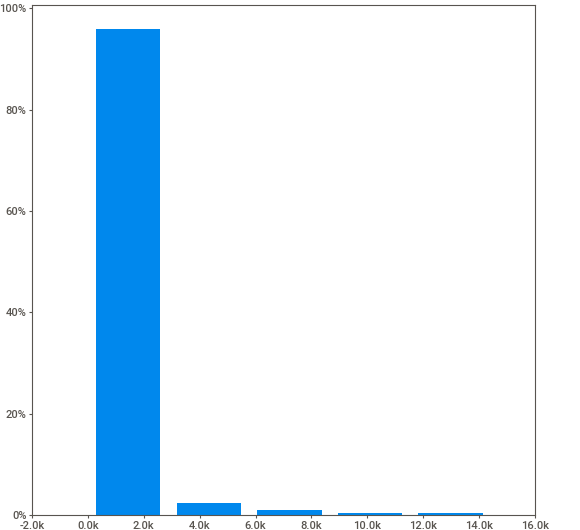
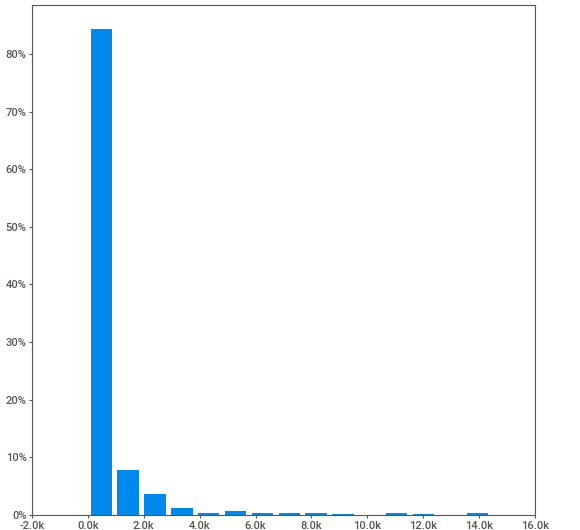
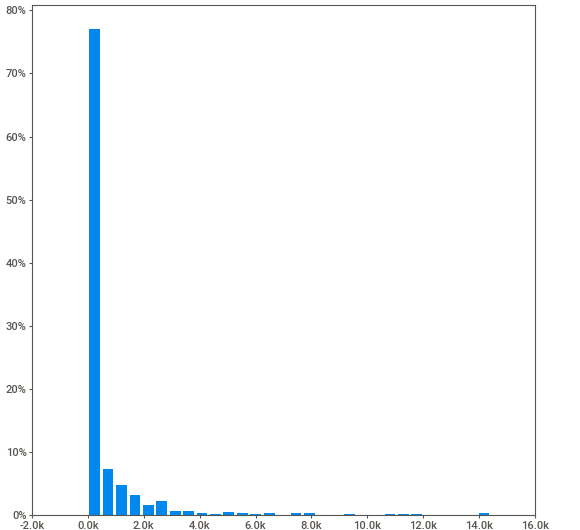
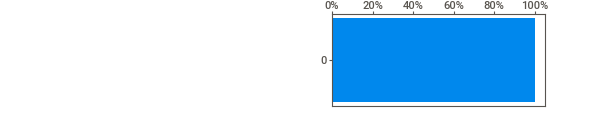
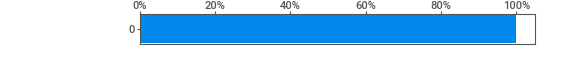
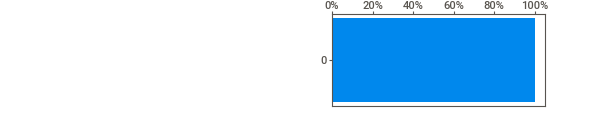
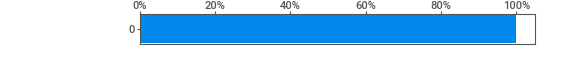
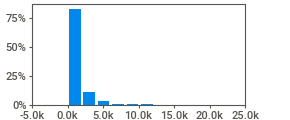
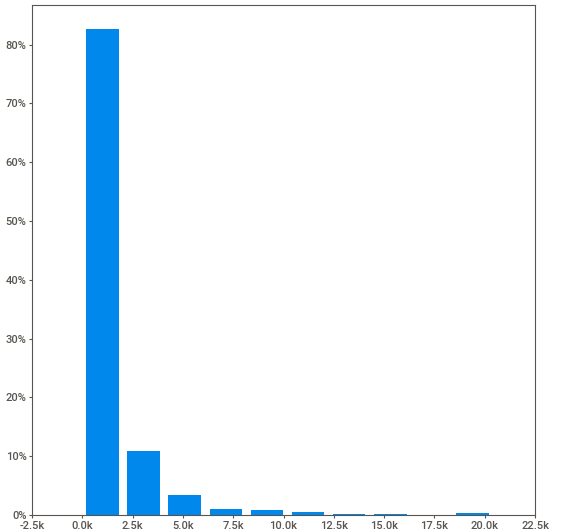
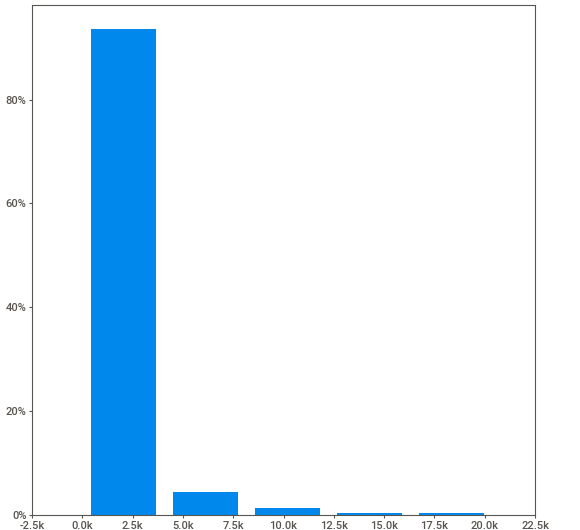
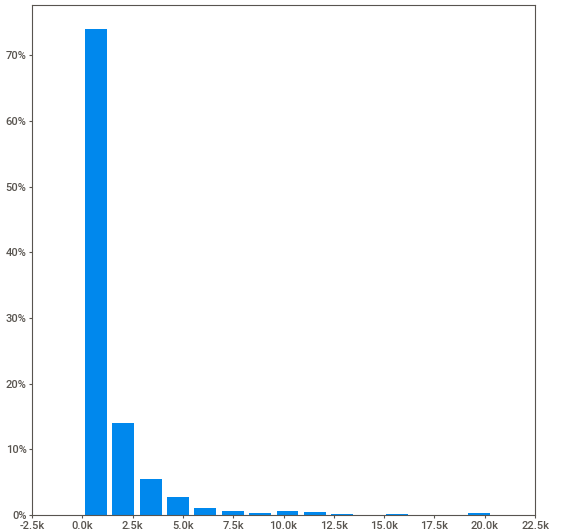
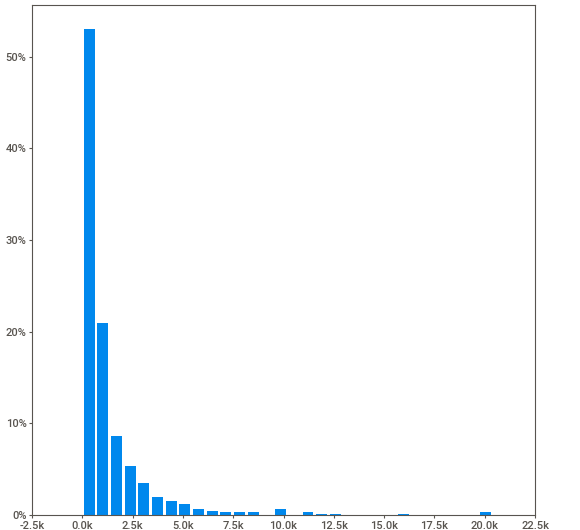
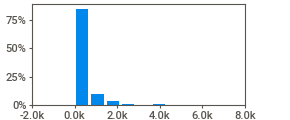
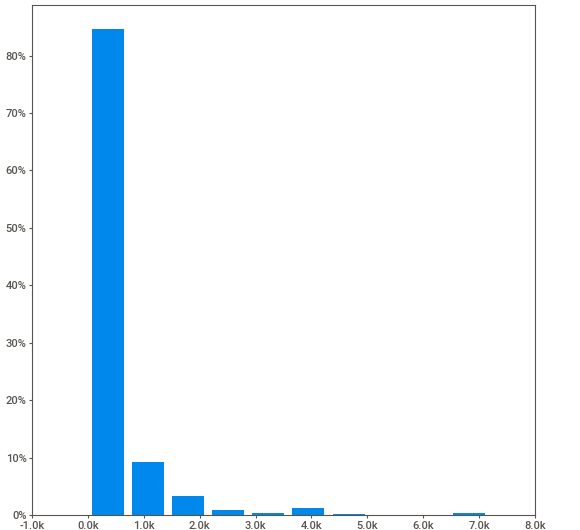
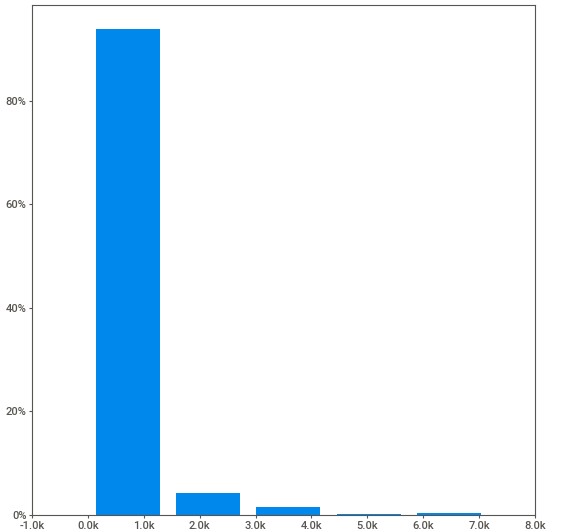
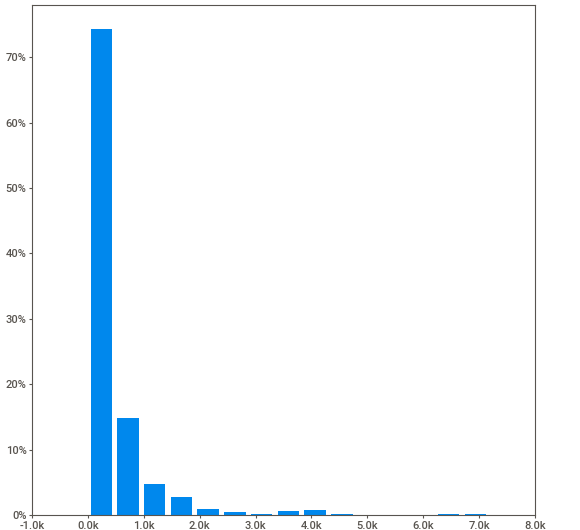
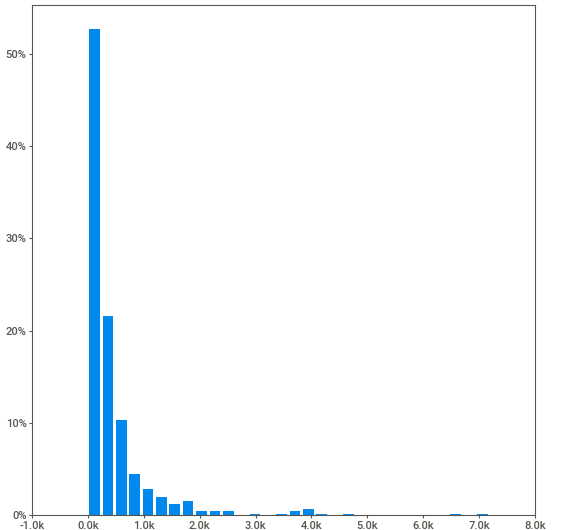
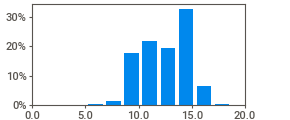
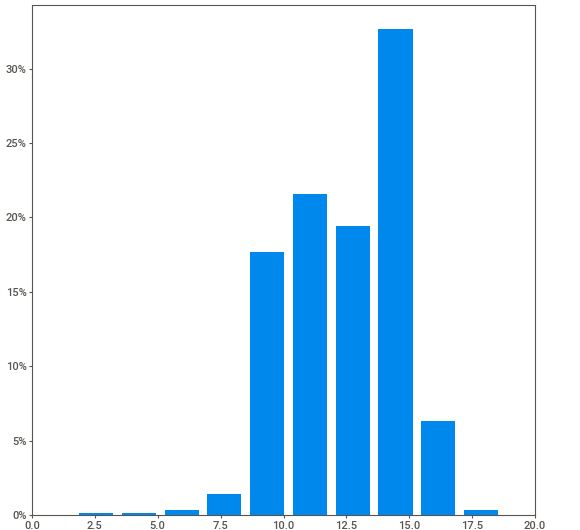
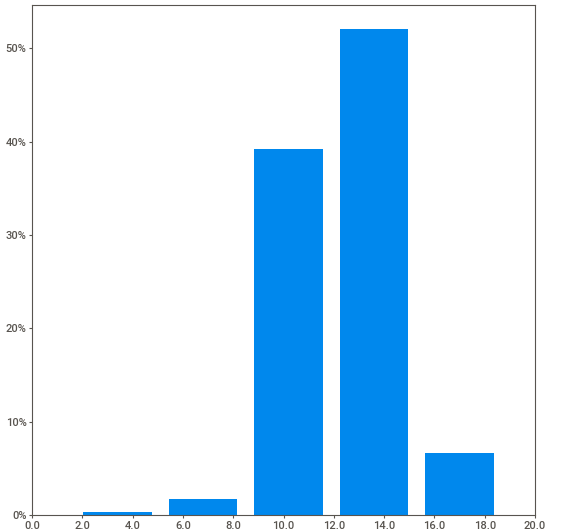
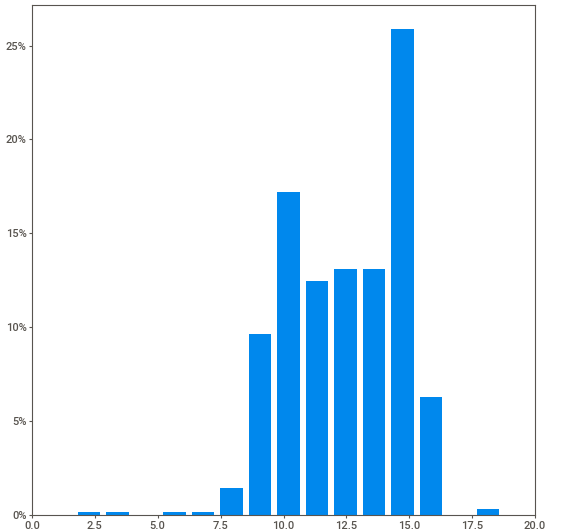
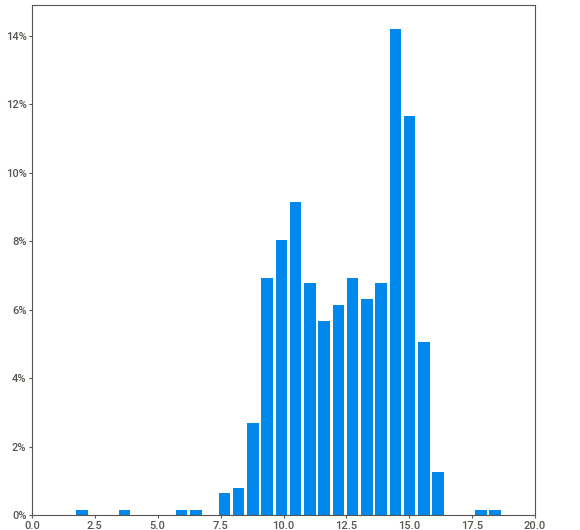
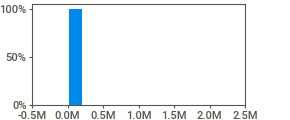
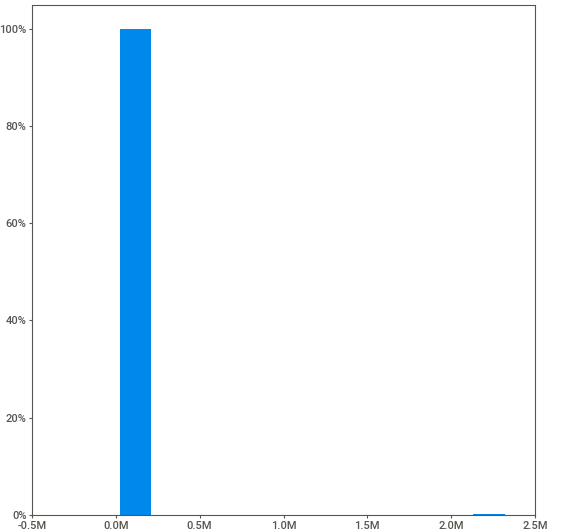
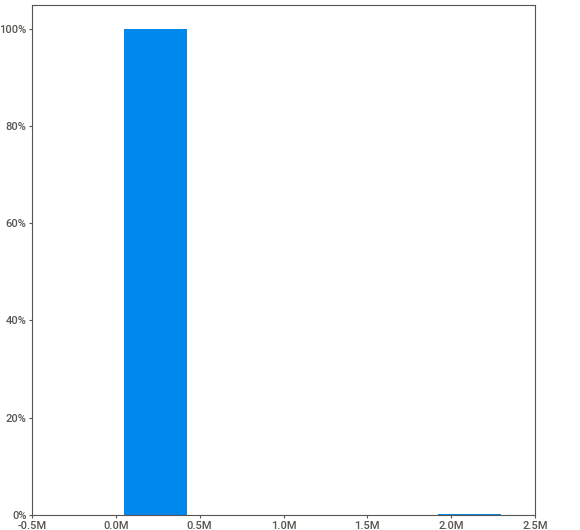
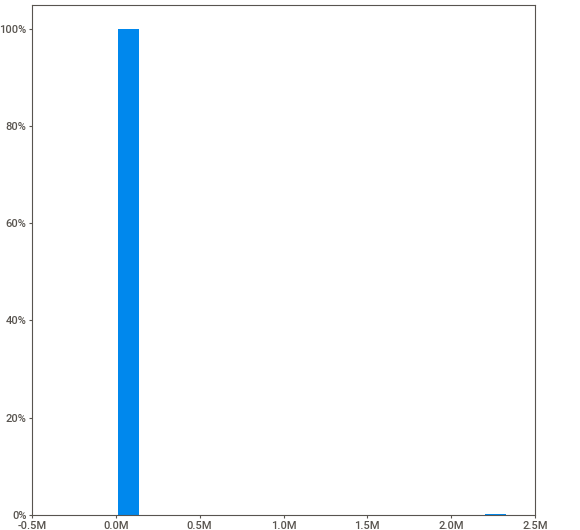
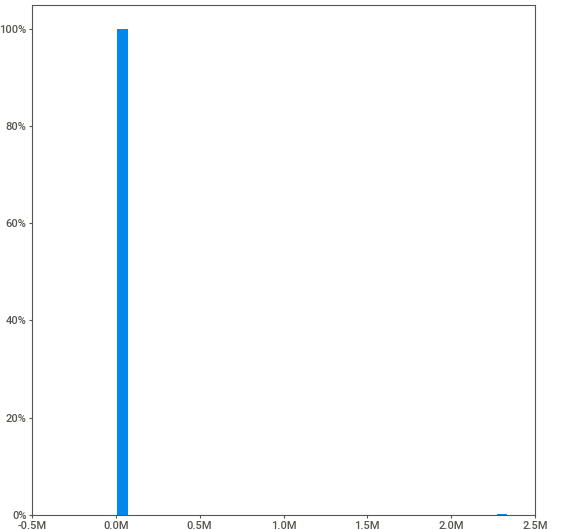
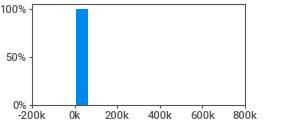
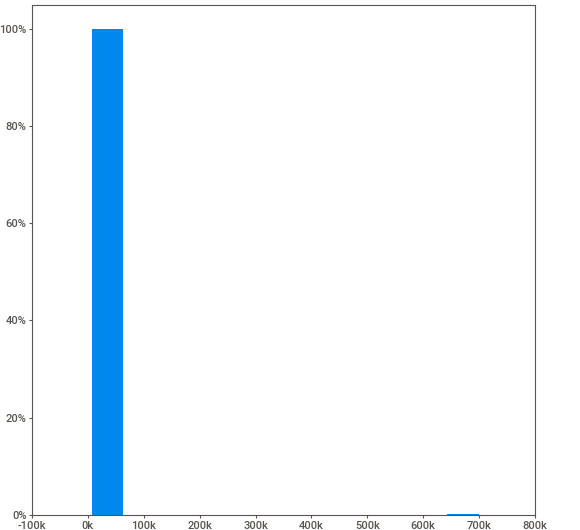
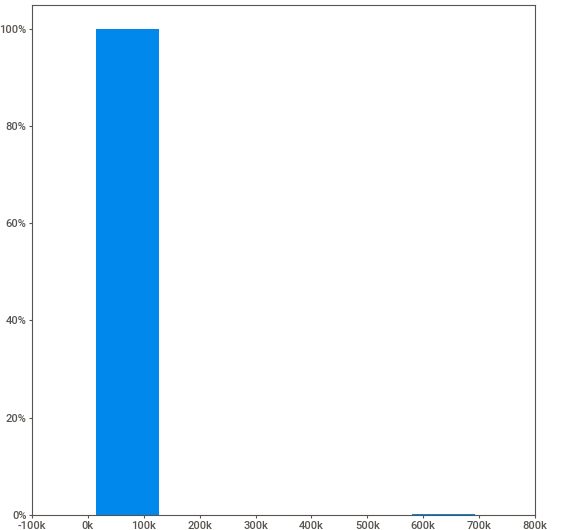
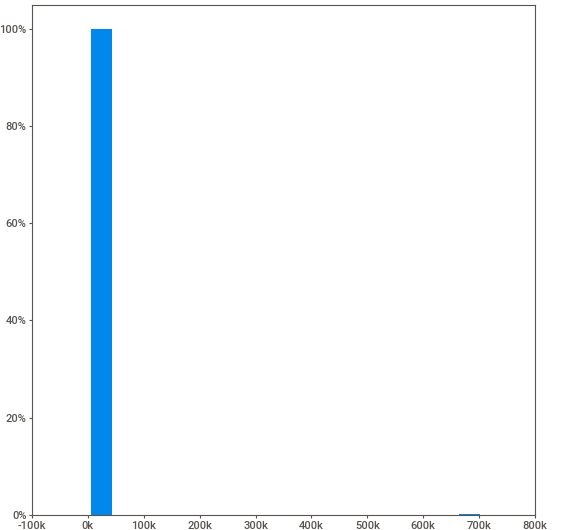
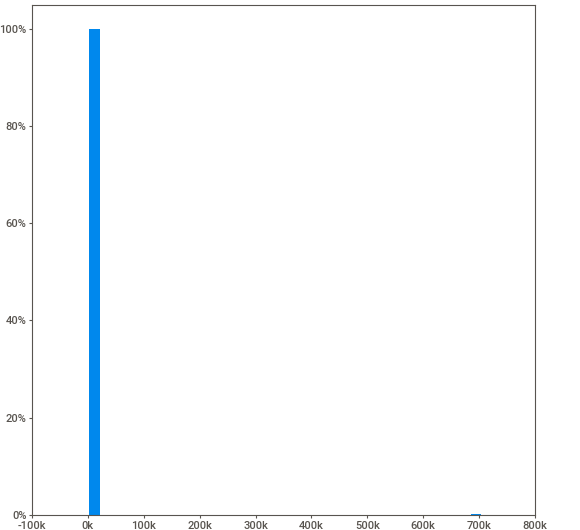
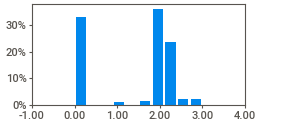
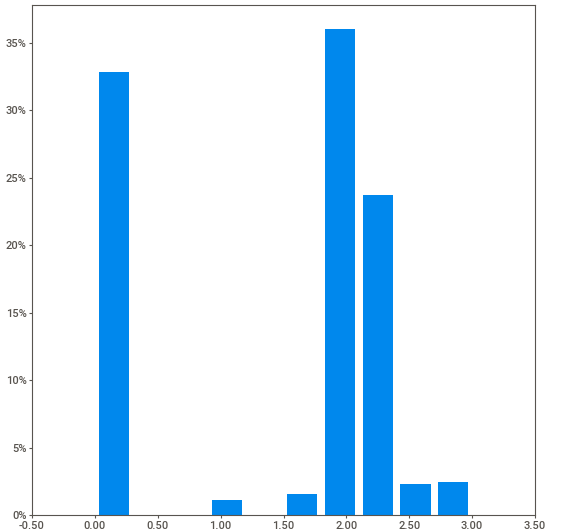
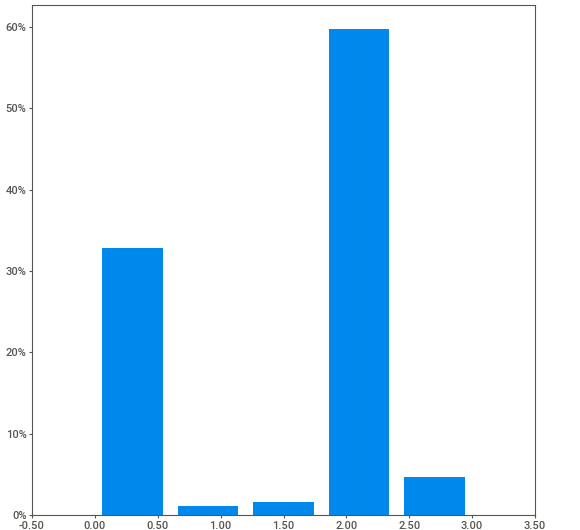
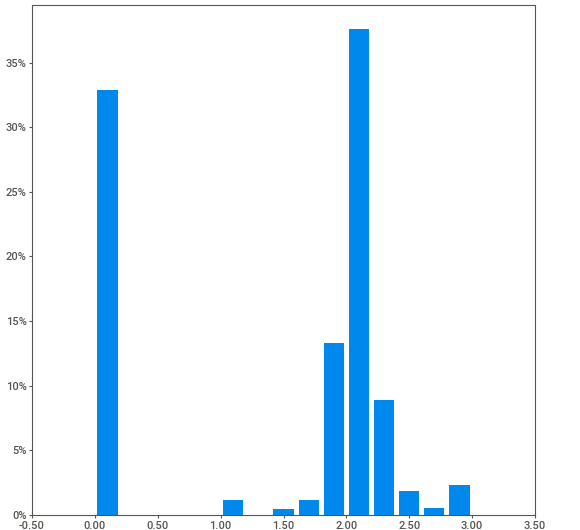
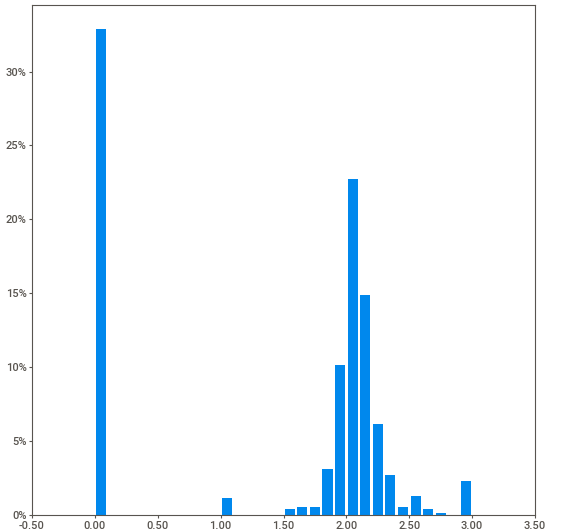
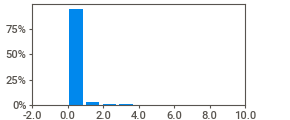
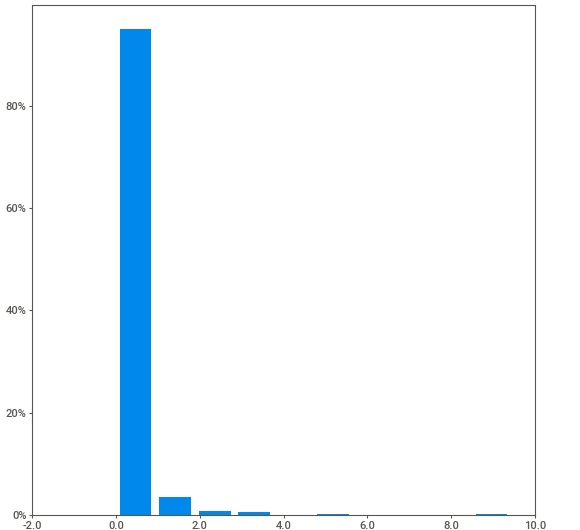
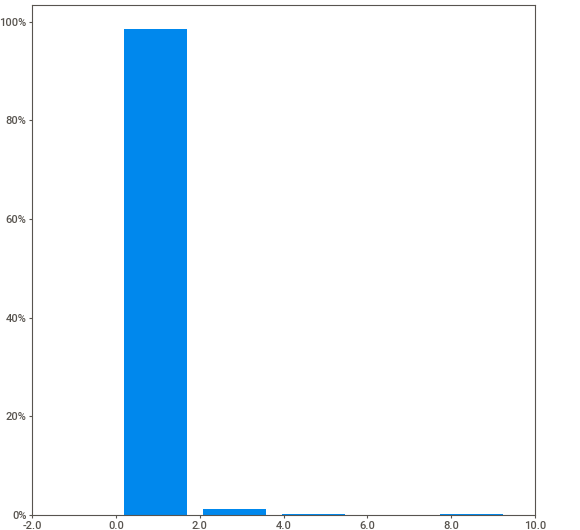
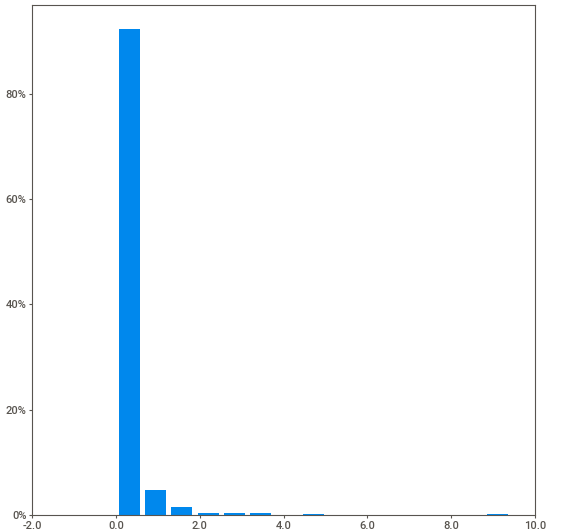
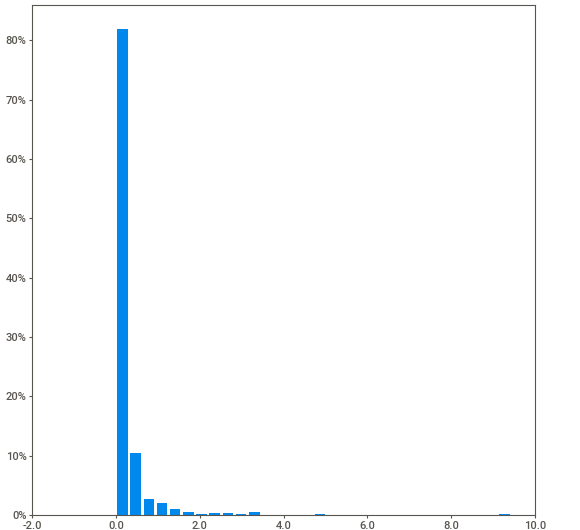
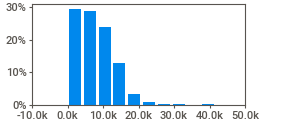
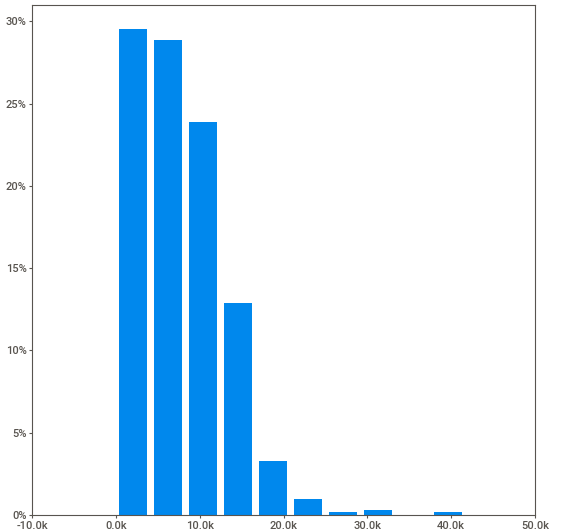
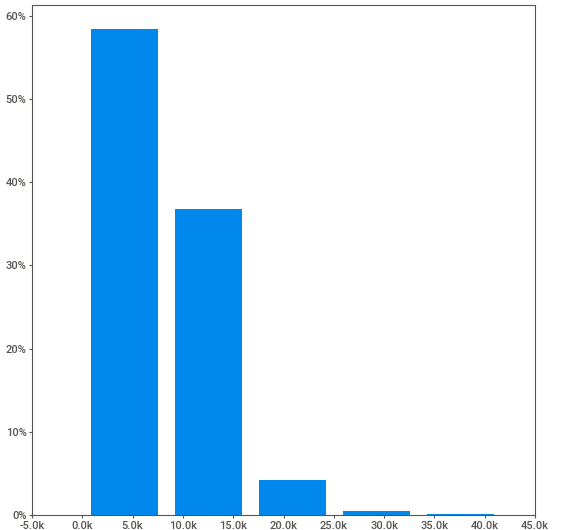
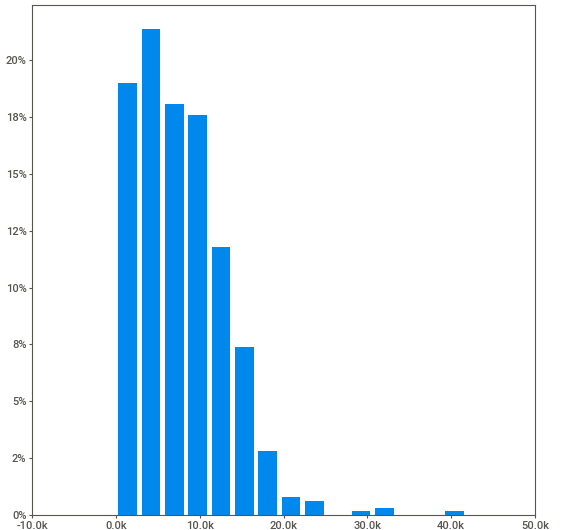
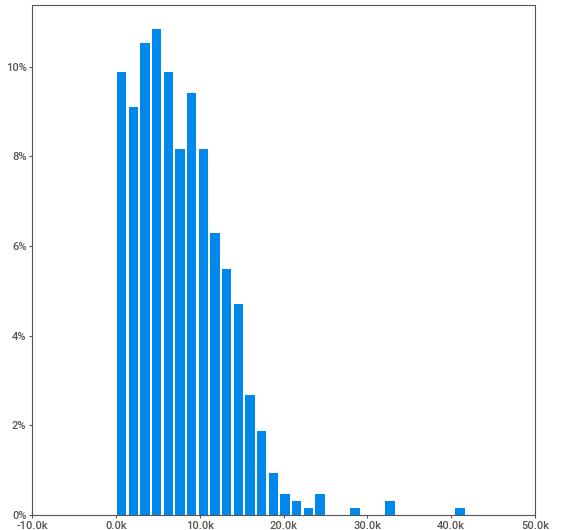
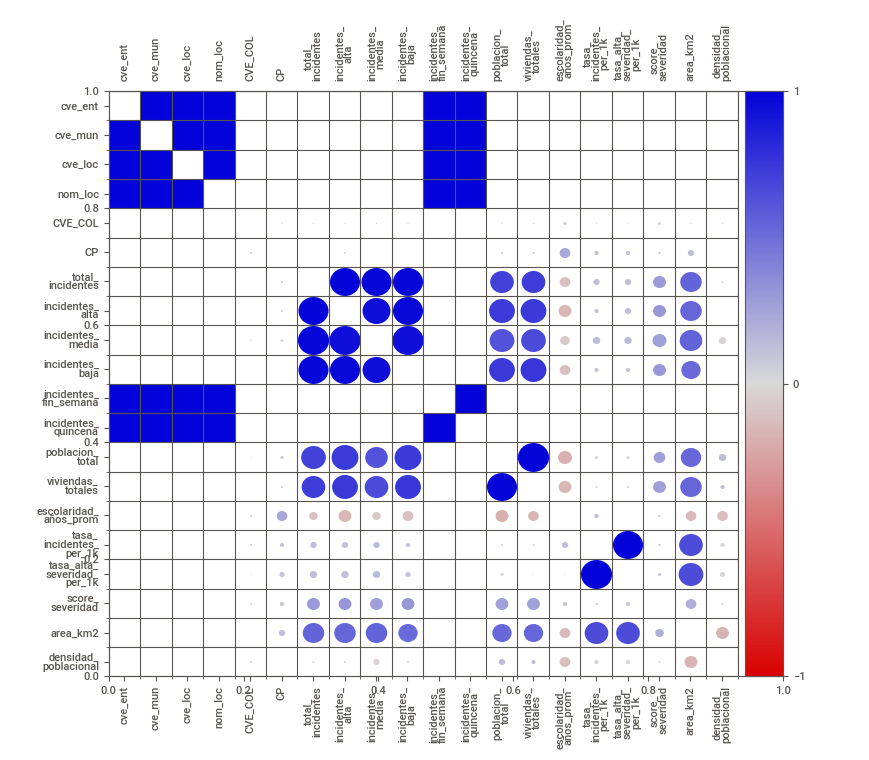
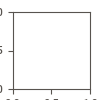

In [9]:
# Mostrar el reporte en el notebook
report.show_notebook()

## 5. Exportación del Reporte a HTML

Exporte el reporte a un archivo HTML para visualización externa y compartir con otros usuarios.

In [ ]:
# Definir ruta de exportación
output_dir = Path('../reports')
output_dir.mkdir(parents=True, exist_ok=True)
output_file = output_dir / 'sweetviz_report_poligonos_unificados.html'

# Verificar existencia de 'report'; si no existe intentar generarlo (solo si 'df' está disponible)
if 'report' not in globals():
	if 'df' in globals():
		print("⚠️ 'report' no estaba definido. Generando reporte SweetViz...")
		report = sweetviz.analyze(df)
		print("✅ Reporte generado correctamente.")
	else:
		print("❌ No se encontró el dataset 'df'. Ejecute primero las celdas de carga y generación del reporte (secciones 2 y 3).")
		report = None

# Exportar reporte solo si fue generado
if report is not None:
	print(f"💾 Exportando reporte a: {output_file.name}")
	report.show_html(str(output_file))
	print(f"\n✅ Reporte exportado correctamente")
	print(f"📁 Ubicación: {output_file.resolve()}")
	print(f"\n💡 Abra el archivo HTML en su navegador para visualizar el análisis completo.")

💾 Exportando reporte a: sweetviz_report_poligonos_unificados.html
Report ..\reports\sweetviz_report_poligonos_unificados.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.

✅ Reporte exportado correctamente
📁 Ubicación: C:\Users\joel_\indice-delictivo-hermosillo\reports\sweetviz_report_poligonos_unificados.html

💡 Abra el archivo HTML en su navegador para visualizar el análisis completo.
